In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numpy as np
import itertools
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from matplotlib.pyplot import figure
sns.set()

In [70]:
df = pd.read_csv('../dataset/Discovery_Cohort2020_08_25_forTing_imputed_fifth_min.csv')

In [71]:
df_DLB_only = df[df['Diagnosis'] == 'DLB']

In [72]:
# include both DLB and ctrl patients
# names = df.columns[5:]
# y = df['Diagnosis'].to_numpy()
# y = np.where(y == 'DLB', 0, y)
# y = np.where(y == 'CTRL', 1, y)
# y = y.tolist()
# X = df.iloc[:, 5:].to_numpy()
# scaler=MinMaxScaler((-1,1))
# X = scaler.fit_transform(X)

In [73]:
# include only DLB patients
X = df_DLB_only.iloc[:, 5:].to_numpy()
scaler=MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)

In [76]:
pca.fit(X)

PCA(n_components=2)

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)

In [115]:
clustering

AgglomerativeClustering(linkage='complete')

In [116]:
cluster_labels = clustering.labels_

In [117]:
np.count_nonzero(cluster_labels)

6

In [118]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)

In [119]:
# dftsne = pd.DataFrame(pca)
# dftsne['cluster'] = cluster_labels
# dftsne.columns = ['x1','x2','cluster']

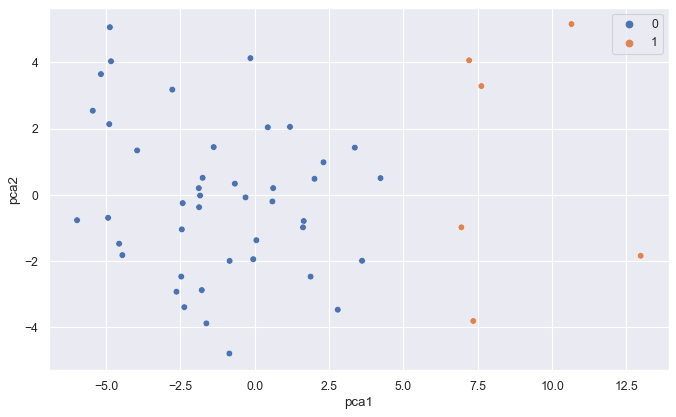

In [120]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x= pca_X[:, 0], y = pca_X[:, 1], hue = cluster_labels)
ax = sns.scatterplot(x= pca_X[:, 0], y = pca_X[:, 1], hue = cluster_labels)
ax.set_xlabel('pca1', fontsize=12)
ax.set_ylabel('pca2', fontsize=12)
plt.savefig('hierarchical_pca.jpeg', dpi=300, format='JPEG')

age

In [97]:
cluster_num = 1

6

In [99]:
df_age = df_DLB_only.sort_values('Age')

In [100]:
df_age.iloc[0][4]

55

In [101]:
ages = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        ages.append(df_age.iloc[c][4])

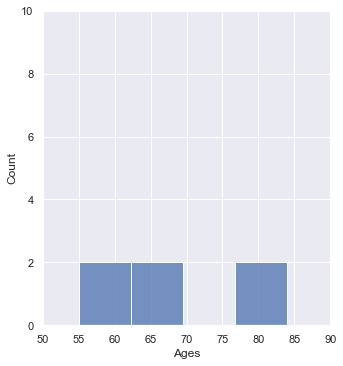

In [102]:
ax = sns.displot(ages)
ax.set_xlabels('Ages')
ax.set(xlim=(50,90), ylim=(0, 10))
# ax.set_ylim(0, 1)
# ax.set_xlabel('age', fontsize=12)
# ax.set_ylabel('correctly classified percentage', fontsize=12)
plt.savefig('age.jpeg', dpi=300, format='JPEG')

In [103]:
gender = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        gender.append(df_age.iloc[c][3])

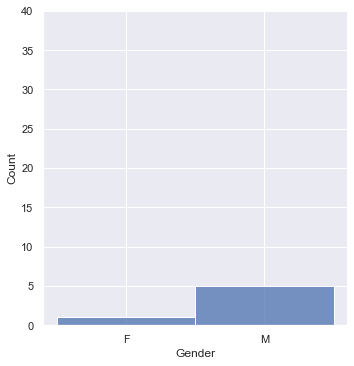

In [104]:
ax = sns.displot(sorted(gender))
ax.set_xlabels('Gender')
ax.set(ylim=(0, 40))
plt.savefig('gender.jpeg', dpi=300, format='JPEG')

In [105]:
mmse_df = pd.read_csv('../dataset/MMSE.csv')
mmse_df = mmse_df[df['Diagnosis'] == 'DLB']

In [106]:
mmse_list = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        mmse_list.append(mmse_df.iloc[c][3])

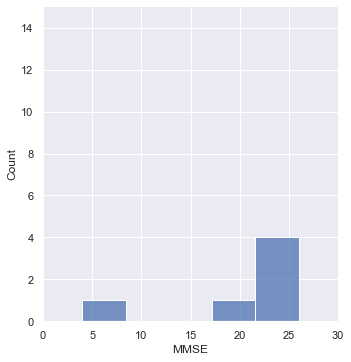

In [107]:
ax = sns.displot(mmse_list)
ax.set_xlabels("MMSE")
ax.set(xlim=(0, 30), ylim=(0,15))
plt.savefig('MMSE_dis.jpeg', dpi=300, format='JPEG')